In [9]:
from pathlib import Path
import pickle
from dataclasses import dataclass

import numpy as np
import numpy.typing as npt
from centrex_tlf import hamiltonian, states
import matplotlib.pyplot as plt


In [2]:
data_path = Path().cwd()


@dataclass
class HamiltonianX:
    uncoupled_states: list[states.UncoupledBasisState]
    coupled_states: list[states.UncoupledBasisState]
    hamiltonian: hamiltonian.HamiltonianUncoupledX
    transform: npt.NDArray[np.complex_]


In [38]:
with open(data_path / "X_state_ham.pkl", "rb") as f:
    hamiltonian_x = HamiltonianX(**pickle.load(f))


In [55]:
Evec = np.array([0, 0, 0])
Bvec = np.array([0, 0, 1e-5])

selector = states.QuantumSelector(J=1, electronic=states.ElectronicState.X)


In [67]:
hamiltonian_func = hamiltonian.generate_uncoupled_hamiltonian_X_function(
    hamiltonian_x.hamiltonian
)
ham = (
    hamiltonian_x.transform.conj().T
    @ hamiltonian_func(Evec, Bvec)
    @ hamiltonian_x.transform
)


In [ ]:
ham.couple

In [78]:
ham_diag = hamiltonian.generate_diagonalized_hamiltonian(
    ham, keep_order=True, return_V_ref=True
)

states_diag = hamiltonian.matrix_to_states(
    ham_diag.V, list(hamiltonian_x.coupled_states)
)
selected_states = states.find_exact_states(
    [1 * state for state in states.generate_coupled_states_X(selector)],
    [1 * state for state in hamiltonian_x.coupled_states],
    states_diag,
    ham_diag.H,
    ham_diag.V,
)
selected_states = [state.remove_small_components(1e-3) for state in selected_states]

ham_reduced = hamiltonian.reduced_basis_hamiltonian(
    states_diag, ham_diag.H, selected_states
)


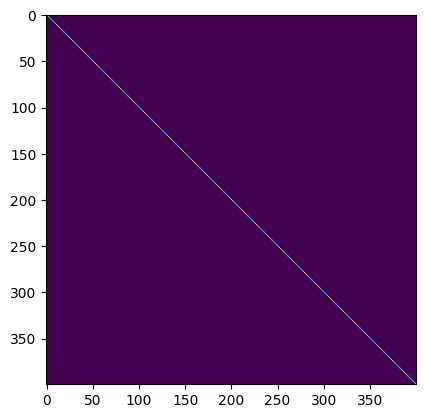

In [73]:
plt.imshow(overlaps.real)